# QuLBIT: a new type of decision support system

QuLBIT is the foundation of a new type of decision support system that deals with uncertainty using the formalisms of quantum mechanics. The main advantage of this framework is that it can capture human paradoxical and irrational decisions during the inference process, which can be very useful not only for cognitive systems, but also for decision-making systems that deal with human data. The quantum-like approach also enables the expression of a prediction using quantum interference effects.

---

We start the program by scrapping a Bayesian Network from a HUGIN.net file, and storing each node as a Python object.

To do so, we ask for the user to input the file's location. The following Bayesian Networks are in this repo to be used as examples/testing material and you can call them simply by typing their names:

* asia.net
* barley.net
* child.net

In [1]:
from convert_network import file_scrapper
from Nodes_ import Node
path = input("Input Bayesian Network's path")
network = open(path, "r").read()
nodes_list, variable_names = file_scrapper(network)

# call the get_info for each node nodes_list, showing all relevant information

def show_factor(factor):
    for i in factor:
        print(Node.node_info(i))
    return None

show_factor(nodes_list)


Input Bayesian Network's path child.net


('BirthAsphyxia', [0.10000000149011612, 0.8999999761581421], [0], ['yes', 'no'], [2])
('HypDistrib', [0.949999988079071, 0.05000000074505806, 0.949999988079071, 0.05000000074505806, 0.949999988079071, 0.05000000074505806, 0.949999988079071, 0.05000000074505806, 0.949999988079071, 0.05000000074505806, 0.949999988079071, 0.05000000074505806, 0.949999988079071, 0.05000000074505806, 0.949999988079071, 0.05000000074505806, 0.05000000074505806, 0.949999988079071, 0.5, 0.5, 0.949999988079071, 0.05000000074505806, 0.5, 0.5], [1, 16, 15], ['Equal', 'Unequal'], [2, 4, 3])
('HypoxiaInO2', [0.9300000071525574, 0.05000000074505806, 0.019999999552965164, 0.15000000596046448, 0.800000011920929, 0.05000000074505806, 0.699999988079071, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.800000011920929, 0.10000000149011612, 0.10000000149011612, 0.75, 0.15000000596046448, 0.10000000149011612, 0.6499999761581421, 0.25, 0.10000000149011612, 0.699999988079071, 0.20000000298023224, 0.0500000007

Now the Bayesian Network has been scrapped from the file. We are using pyagrum to generate the visuals. All import statements are in the cell below


In [2]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
import os

import pandas as pd
import numpy as np

#Python Library that deals with Bayesan Networks (BNs)
import pyAgrum as bn_graphs
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

from pyAgrum.lib.bn2roc import showROC

import seaborn as sns
sns.set()


In [3]:
bn = bn_graphs.BayesNet(path[:-4]) #Creates an empty network called CancerBN
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}


The above code builds a general network structure, but with no nodes or edges or conditional probability tables. Our next step will be precisely to specify these variables.

---

## Create the Random Variables (the nodes)
To create a random variable, we need to use pyAgrum's function LabelizedVariable, which is a variable whose domain is a finite set of labels. You can do it in the following way:

In [4]:
#Creates a new node for each of the random variables in nodes_lst
arc_list = []
for node in nodes_list:
    print(node.name)
    var = bn_graphs.LabelizedVariable(node.name, node.name, 0)  #creates random variable
    
    for state in node.state_names:
        var.addLabel(state)                            #adds the labels from each node
    bn.add(var)
    
    for variable in node.variables:
        if node.variables.index(variable)>0:
            mini_tuple = (nodes_list[variable].name, node.name,)
            arc_list.append(mini_tuple)
        else:
            continue                       

for arc in arc_list:
    bn.addArc( arc[0],  arc[1] )      #adds the created arc to the network

print(bn)

BirthAsphyxia
HypDistrib
HypoxiaInO2
CO2
ChestXray
Grunting
LVHreport
LowerBodyO2
RUQO2
CO2Report
XrayReport
Disease
GruntingReport
Age
LVH
DuctFlow
CardiacMixing
LungParench
LungFlow
Sick
BN{nodes: 20, arcs: 25, domainSize: 10^9.00336, dim: 344}


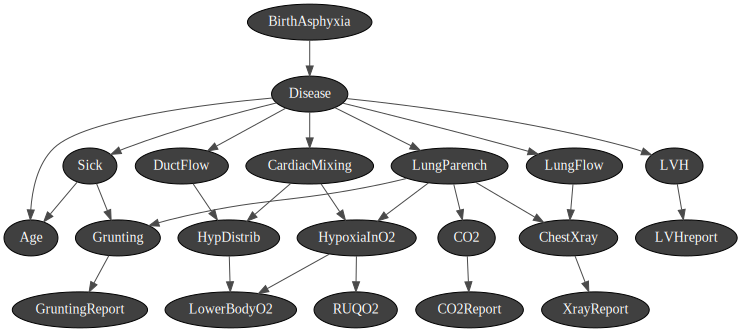

In [5]:
gnb.showBN(bn, size=80)

Now we must add the probabilities for each case possible. We are using the following functions: *

* index_to_assignment:
    For a given index, we are getting the state of each relevant node in the network. The index is going to be used to grab the right value from the probabilities list. The parameters used are index (integer) and cardinality (list).
    
* assignment to index:
    Does the opposite of the previous function: given a scenario, it returns the index for it. This function takes assignments and cardinality as parameter, both in list format. 
    

In [6]:
from index_to_assignment import index_to_assignment


for node in nodes_list:
    if len(node.variables) > 1:
        parents = node.variables[1:]
        parents = [nodes_list[i].name for i in parents]
        parents_states_dict = dict.fromkeys(parents)
        index = 0
        card_n = len(node.cardinality) - 1
        count = 0
        for i in (range(int(len(node.probabilities)/node.cardinality[0])+1)[1:]):
            assignment = index_to_assignment(i, node.cardinality[1:])
            assignment = [int(i) for  i in assignment]         
            set_prob = node.probabilities[index:index+node.cardinality[0]]
            index = index + node.cardinality[0]
            for key, state in zip(parents_states_dict, assignment):
                parents_states_dict[key] = nodes_list[variable_names.index(key)].state_names[int(state)]
            bn.cpt(node.name)[parents_states_dict] = set_prob
    else:
        bn.cpt(node.name).fillWith(node.probabilities)


[1. 1. 2.]
<class 'numpy.ndarray'>
[1. 1. 2.]
[0. 0.]
<class 'numpy.ndarray'>
[0. 0.]
[1. 0.]
<class 'numpy.ndarray'>
[1. 0.]
[2. 0.]
<class 'numpy.ndarray'>
[2. 0.]
[3. 0.]
<class 'numpy.ndarray'>
[3. 0.]
[0. 1.]
<class 'numpy.ndarray'>
[0. 1.]
[1. 1.]
<class 'numpy.ndarray'>
[1. 1.]
[2. 1.]
<class 'numpy.ndarray'>
[2. 1.]
[3. 1.]
<class 'numpy.ndarray'>
[3. 1.]
[0. 2.]
<class 'numpy.ndarray'>
[0. 2.]
[1. 2.]
<class 'numpy.ndarray'>
[1. 2.]
[2. 2.]
<class 'numpy.ndarray'>
[2. 2.]
[3. 2.]
<class 'numpy.ndarray'>
[3. 2.]
[0. 0.]
<class 'numpy.ndarray'>
[0. 0.]
[1. 0.]
<class 'numpy.ndarray'>
[1. 0.]
[2. 0.]
<class 'numpy.ndarray'>
[2. 0.]
[0. 1.]
<class 'numpy.ndarray'>
[0. 1.]
[1. 1.]
<class 'numpy.ndarray'>
[1. 1.]
[2. 1.]
<class 'numpy.ndarray'>
[2. 1.]
[0. 2.]
<class 'numpy.ndarray'>
[0. 2.]
[1. 2.]
<class 'numpy.ndarray'>
[1. 2.]
[2. 2.]
<class 'numpy.ndarray'>
[2. 2.]
[0. 3.]
<class 'numpy.ndarray'>
[0. 3.]
[1. 3.]
<class 'numpy.ndarray'>
[1. 3.]
[2. 3.]
<class 'numpy.ndarray'>
[2

In [10]:
# asia
# bn.cpt("asia")


(gum::Potential<double>@0x1d7dde1a6c0) <asia:yes> :: 0.01 /<asia:no> :: 0.99

In [8]:
# child
bn.cpt("HypoxiaInO2")

(gum::Potential<double>@0x238486b0dc0) <HypoxiaInO2:Mild|LungParench:Normal|CardiacMixing:None> :: 0.93 /<HypoxiaInO2:Moderate|LungParench:Normal|CardiacMixing:None> :: 0.05 /<HypoxiaInO2:Severe|LungParench:Normal|CardiacMixing:None> :: 0.02 /<HypoxiaInO2:Mild|LungParench:Congested|CardiacMixing:None> :: 0.15 /<HypoxiaInO2:Moderate|LungParench:Congested|CardiacMixing:None> :: 0.8 /<HypoxiaInO2:Severe|LungParench:Congested|CardiacMixing:None> :: 0.05 /<HypoxiaInO2:Mild|LungParench:Abnormal|CardiacMixing:None> :: 0.7 /<HypoxiaInO2:Moderate|LungParench:Abnormal|CardiacMixing:None> :: 0.2 /<HypoxiaInO2:Severe|LungParench:Abnormal|CardiacMixing:None> :: 0.1 /<HypoxiaInO2:Mild|LungParench:Normal|CardiacMixing:Mild> :: 0.1 /<HypoxiaInO2:Moderate|LungParench:Normal|CardiacMixing:Mild> :: 0.8 /<HypoxiaInO2:Severe|LungParench:Normal|CardiacMixing:Mild> :: 0.1 /<HypoxiaInO2:Mild|LungParench:Congested|CardiacMixing:Mild> :: 0.1 /<HypoxiaInO2:Moderate|LungParench:Congested|CardiacMixing:Mild> :: 0.75 /<HypoxiaInO2:Severe|LungParench:Congested|CardiacMixing:Mild> :: 0.15 /<HypoxiaInO2:Mild|LungParench:Abnormal|CardiacMixing:Mild> :: 0.1 /<HypoxiaInO2:Moderate|LungParench:Abnormal|CardiacMixing:Mild> :: 0.65 /<HypoxiaInO2:Severe|LungParench:Abnormal|CardiacMixing:Mild> :: 0.25 /<HypoxiaInO2:Mild|LungParench:Normal|CardiacMixing:Complete> :: 0.1 /<HypoxiaInO2:Moderate|LungParench:Normal|CardiacMixing:Complete> :: 0.7 /<HypoxiaInO2:Severe|LungParench:Normal|CardiacMixing:Complete> :: 0.2 /<HypoxiaInO2:Mild|LungParench:Congested|CardiacMixing:Complete> :: 0.05 /<HypoxiaInO2:Moderate|LungParench:Congested|CardiacMixing:Complete> :: 0.65 /<HypoxiaInO2:Severe|LungParench:Congested|CardiacMixing:Complete> :: 0.3 /<HypoxiaInO2:Mild|LungParench:Abnormal|CardiacMixing:Complete> :: 0.1 /<HypoxiaInO2:Moderate|LungParench:Abnormal|CardiacMixing:Complete> :: 0.5 /<HypoxiaInO2:Severe|LungParench:Abnormal|CardiacMixing:Complete> :: 0.4 /<HypoxiaInO2:Mild|LungParench:Normal|CardiacMixing:Transp.> :: 0.02 /<HypoxiaInO2:Moderate|LungParench:Normal|CardiacMixing:Transp.> :: 0.18 /<HypoxiaInO2:Severe|LungParench:Normal|CardiacMixing:Transp.> :: 0.8 /<HypoxiaInO2:Mild|LungParench:Congested|CardiacMixing:Transp.> :: 0.1 /<HypoxiaInO2:Moderate|LungParench:Congested|CardiacMixing:Transp.> :: 0.3 /<HypoxiaInO2:Severe|LungParench:Congested|CardiacMixing:Transp.> :: 0.6 /<HypoxiaInO2:Mild|LungParench:Abnormal|CardiacMixing:Transp.> :: 0.02 /<HypoxiaInO2:Moderate|LungParench:Abnormal|CardiacMixing:Transp.> :: 0.18 /<HypoxiaInO2:Severe|LungParench:Abnormal|CardiacMixing:Transp.> :: 0.8

In [9]:
#bn.cpt("nprot")

(gum::Potential<double>@0x294cc723ca0) <nprot:x_40|ngodn:x_45|jordn:x0_15> :: 0.9993 /<nprot:x40_60|ngodn:x_45|jordn:x0_15> :: 9.993e-05 /<nprot:x60_80|ngodn:x_45|jordn:x0_15> :: 9.993e-05 /<nprot:x80_100|ngodn:x_45|jordn:x0_15> :: 9.993e-05 /<nprot:x100_120|ngodn:x_45|jordn:x0_15> :: 9.993e-05 /<nprot:x120_140|ngodn:x_45|jordn:x0_15> :: 9.993e-05 /<nprot:x140_160|ngodn:x_45|jordn:x0_15> :: 9.993e-05 /<nprot:x_160|ngodn:x_45|jordn:x0_15> :: 9.993e-05 /<nprot:x_40|ngodn:x45_60|jordn:x0_15> :: 0.9993 /<nprot:x40_60|ngodn:x45_60|jordn:x0_15> :: 9.993e-05 /<nprot:x60_80|ngodn:x45_60|jordn:x0_15> :: 9.993e-05 /<nprot:x80_100|ngodn:x45_60|jordn:x0_15> :: 9.993e-05 /<nprot:x100_120|ngodn:x45_60|jordn:x0_15> :: 9.993e-05 /<nprot:x120_140|ngodn:x45_60|jordn:x0_15> :: 9.993e-05 /<nprot:x140_160|ngodn:x45_60|jordn:x0_15> :: 9.993e-05 /<nprot:x_160|ngodn:x45_60|jordn:x0_15> :: 9.993e-05 /<nprot:x_40|ngodn:x60_75|jordn:x0_15> :: 0.9993 /<nprot:x40_60|ngodn:x60_75|jordn:x0_15> :: 9.993e-05 /<nprot:x60_80|ngodn:x60_75|jordn:x0_15> :: 9.993e-05 /<nprot:x80_100|ngodn:x60_75|jordn:x0_15> :: 9.993e-05 /<nprot:x100_120|ngodn:x60_75|jordn:x0_15> :: 9.993e-05 /<nprot:x120_140|ngodn:x60_75|jordn:x0_15> :: 9.993e-05 /<nprot:x140_160|ngodn:x60_75|jordn:x0_15> :: 9.993e-05 /<nprot:x_160|ngodn:x60_75|jordn:x0_15> :: 9.993e-05 /<nprot:x_40|ngodn:x75_90|jordn:x0_15> :: 0.9993 /<nprot:x40_60|ngodn:x75_90|jordn:x0_15> :: 9.993e-05 /<nprot:x60_80|ngodn:x75_90|jordn:x0_15> :: 9.993e-05 /<nprot:x80_100|ngodn:x75_90|jordn:x0_15> :: 9.993e-05 /<nprot:x100_120|ngodn:x75_90|jordn:x0_15> :: 9.993e-05 /<nprot:x120_140|ngodn:x75_90|jordn:x0_15> :: 9.993e-05 /<nprot:x140_160|ngodn:x75_90|jordn:x0_15> :: 9.993e-05 /<nprot:x_160|ngodn:x75_90|jordn:x0_15> :: 9.993e-05 /<nprot:x_40|ngodn:x90_105|jordn:x0_15> :: 0.9993 /<nprot:x40_60|ngodn:x90_105|jordn:x0_15> :: 9.993e-05 /<nprot:x60_80|ngodn:x90_105|jordn:x0_15> :: 9.993e-05 /<nprot:x80_100|ngodn:x90_105|jordn:x0_15> :: 9.993e-05 /<nprot:x100_120|ngodn:x90_105|jordn:x0_15> :: 9.993e-05 /<nprot:x120_140|ngodn:x90_105|jordn:x0_15> :: 9.993e-05 /<nprot:x140_160|ngodn:x90_105|jordn:x0_15> :: 9.993e-05 /<nprot:x_160|ngodn:x90_105|jordn:x0_15> :: 9.993e-05 /<nprot:x_40|ngodn:x105_120|jordn:x0_15> :: 0.9993 /<nprot:x40_60|ngodn:x105_120|jordn:x0_15> :: 9.993e-05 /<nprot:x60_80|ngodn:x105_120|jordn:x0_15> :: 9.993e-05 /<nprot:x80_100|ngodn:x105_120|jordn:x0_15> :: 9.993e-05 /<nprot:x100_120|ngodn:x105_120|jordn:x0_15> :: 9.993e-05 /<nprot:x120_140|ngodn:x105_120|jordn:x0_15> :: 9.993e-05 /<nprot:x140_160|ngodn:x105_120|jordn:x0_15> :: 9.993e-05 /<nprot:x_160|ngodn:x105_120|jordn:x0_15> :: 9.993e-05 /<nprot:x_40|ngodn:x120_135|jordn:x0_15> :: 0.9993 /<nprot:x40_60|ngodn:x120_135|jordn:x0_15> :: 9.993e-05 /<nprot:x60_80|ngodn:x120_135|jordn:x0_15> :: 9.993e-05 /<nprot:x80_100|ngodn:x120_135|jordn:x0_15> :: 9.993e-05 /<nprot:x100_120|ngodn:x120_135|jordn:x0_15> :: 9.993e-05 /<nprot:x120_140|ngodn:x120_135|jordn:x0_15> :: 9.993e-05 /<nprot:x140_160|ngodn:x120_135|jordn:x0_15> :: 9.993e-05 /<nprot:x_160|ngodn:x120_135|jordn:x0_15> :: 9.993e-05 /<nprot:x_40|ngodn:x135_150|jordn:x0_15> :: 0.9993 /<nprot:x40_60|ngodn:x135_150|jordn:x0_15> :: 9.993e-05 /<nprot:x60_80|ngodn:x135_150|jordn:x0_15> :: 9.993e-05 /<nprot:x80_100|ngodn:x135_150|jordn:x0_15> :: 9.993e-05 /<nprot:x100_120|ngodn:x135_150|jordn:x0_15> :: 9.993e-05 /<nprot:x120_140|ngodn:x135_150|jordn:x0_15> :: 9.993e-05 /<nprot:x140_160|ngodn:x135_150|jordn:x0_15> :: 9.993e-05 /<nprot:x_160|ngodn:x135_150|jordn:x0_15> :: 9.993e-05 /<nprot:x_40|ngodn:x150_165|jordn:x0_15> :: 0.9993 /<nprot:x40_60|ngodn:x150_165|jordn:x0_15> :: 9.993e-05 /<nprot:x60_80|ngodn:x150_165|jordn:x0_15> :: 9.993e-05 /<nprot:x80_100|ngodn:x150_165|jordn:x0_15> :: 9.993e-05 /<nprot:x100_120|ngodn:x150_165|jordn:x0_15> :: 9.993e-05 /<nprot:x120_140|ngodn:x150_165|jordn:x0_15> :: 9.993e-05 /<nprot:x140_160|ngodn:x150_165|jordn:x0_15> :: 9.993e-05 /<nprot:x_160|ngodn:x150_165|jordn:x0_15> :: 9.993e-05 /<nprot:x

In [9]:
inference = bn_graphs.LazyPropagation(bn)
print(inference)

<pyAgrum.pyAgrum.LazyPropagation; proxy of <Swig Object of type 'gum::LazyPropagation< double > *' at 0x00000238498A6690> >


In [10]:
inference.makeInference()


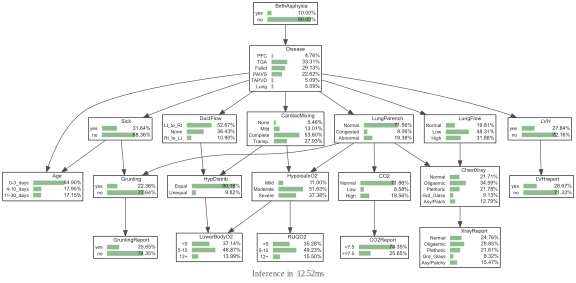

In [11]:
gnb.showInference(bn,evs={})